In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
netflix = pd.read_csv('C:/Users/xy/Downloads/Compressed/netflix_titles.csv')

In [56]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [57]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [58]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [59]:
netflix.shape

(8807, 12)

In [60]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [61]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [62]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [63]:
netflix.isnull().sum()/(len(netflix))*100
#calculates the percentage of missing values for each column in the DataFrame netflix

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [64]:
netflix.drop('director', axis=1, inplace=True)
# drops the 'director' column from the DataFrame
#after this line of code is executed, the 'director' column will no longer be present in netflix

In [65]:
netflix = netflix[netflix['date_added'].notna()]
# filters out any rows in the DataFrame netflix where the 'date_added' column has a missing value

In [66]:
netflix.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [67]:
netflix.rating.fillna('TV-MA', inplace=True)
#Filling null values of rating with most occuring rating

Text(0.5, 1.0, 'Year Wise Releases')

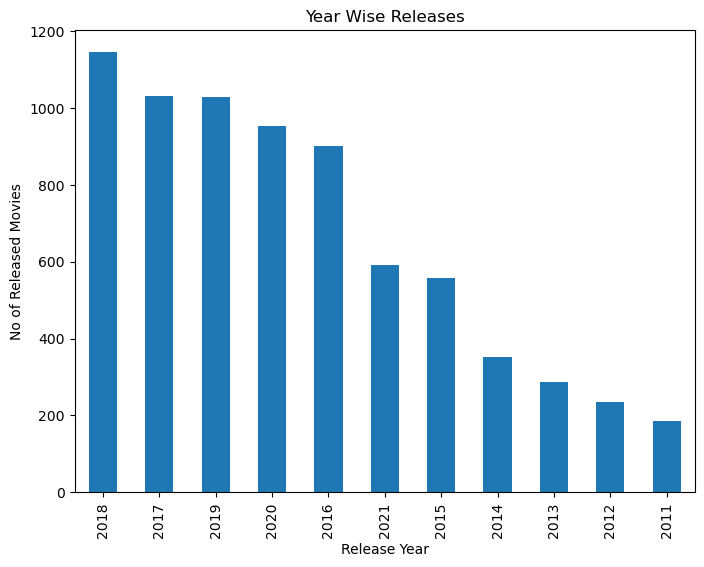

In [68]:
plt.figure(figsize=(10,8))
g = netflix[netflix['release_year'] > 2010].release_year.value_counts().plot.bar(figsize=(8, 6))
g.set_xlabel("Release Year")
g.set_ylabel("No of Released Movies")
g.set_title("Year Wise Releases")

#Year wise number of released movies/shows

In [69]:
netflix.country.value_counts()
#Country Analysis

United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

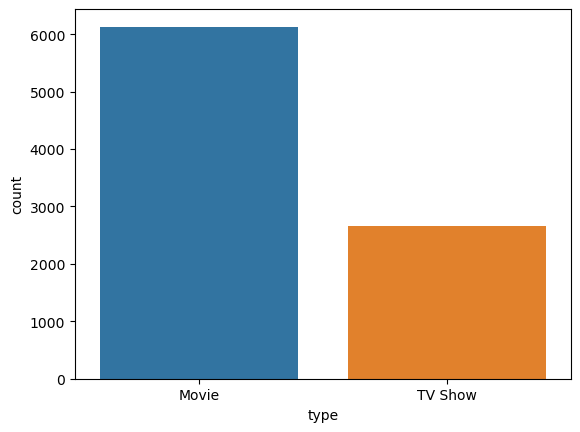

In [71]:
sns.countplot(x='type', data=netflix)

Text(0.5, 1.0, 'Movies vs TV Shows')

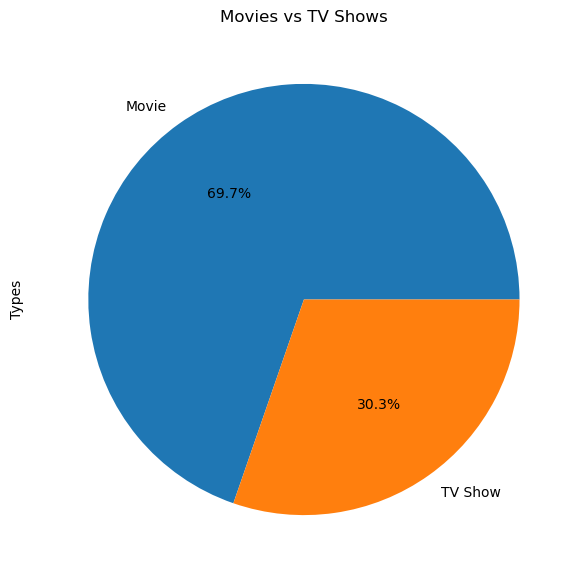

In [27]:
g = netflix.type.value_counts().plot.pie(figsize=(10, 7),autopct= "%1.1f%%")
g.set_ylabel("Types")
g.set_title("Movies vs TV Shows")
#Exploring Movies Vs Shows

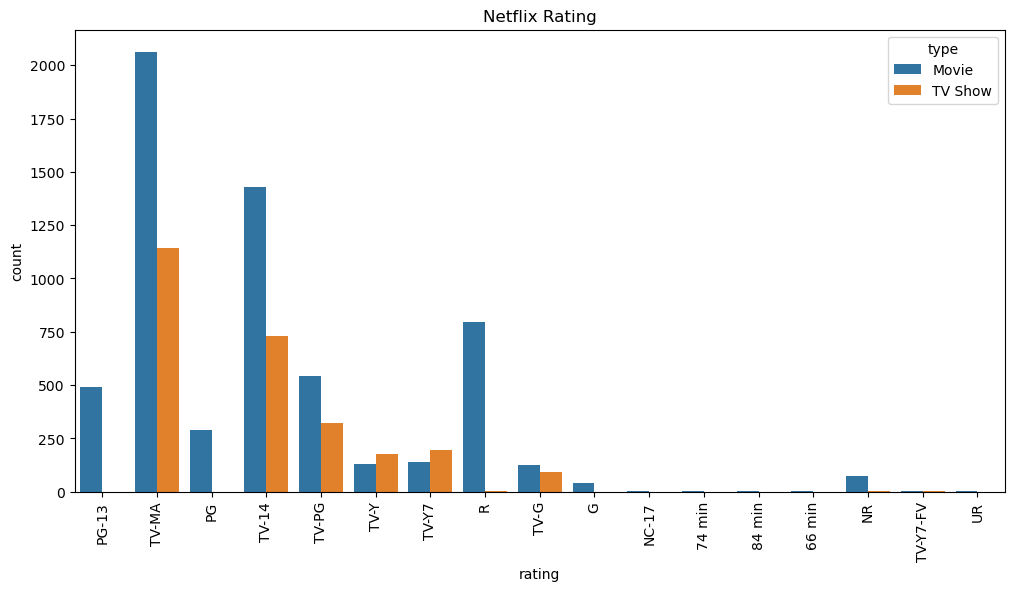

In [74]:
plt.figure(figsize=(12,6))
plt.title("Netflix Rating")
sns.countplot(x=netflix["rating"],hue=netflix["type"]);
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Ratings Wise Counts')

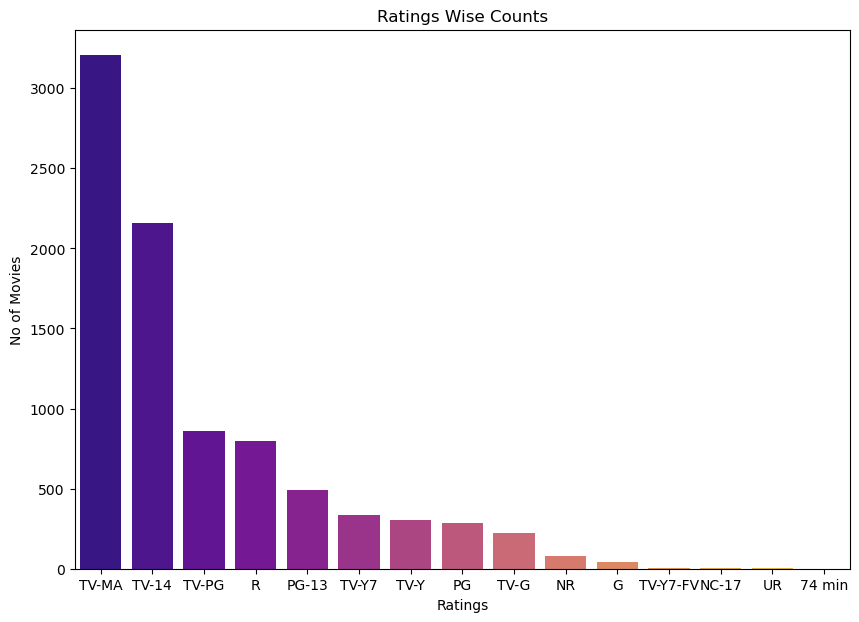

In [30]:
plt.figure(figsize=(10,7))
g = sns.countplot(x='rating', data=netflix, palette='plasma', order=netflix['rating'].value_counts().index[0:15])
g.set_xlabel("Ratings")
g.set_ylabel("No of Movies")
g.set_title("Ratings Wise Counts")

#Content distribution based on rating

Text(0.5, 1.0, 'Top 5 country wise ratings')

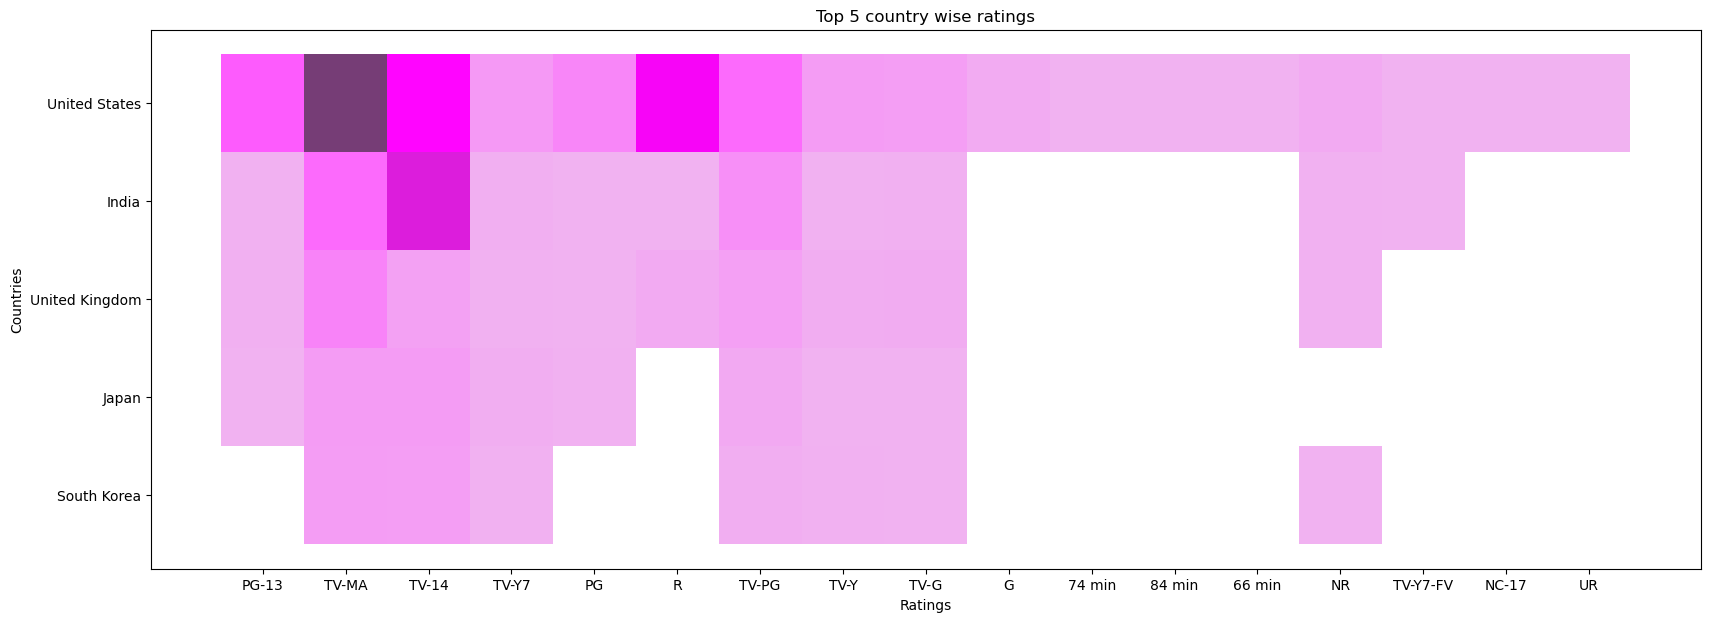

In [75]:
plt.figure(figsize=(20,7))
top_countries = netflix[netflix['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea'])]
g = sns.histplot(x='rating', y='country', data=top_countries,color='Purple')
g.set_xlabel("Ratings")
g.set_ylabel("Countries")
g.set_title("Top 5 country wise ratings")
#visualize the distribution of ratings across the top 5 countries in the dataset

In [76]:
netflix[netflix['type'] == 'Movie'].sort_values('release_year')[0:5]
#Top 5 oldest movies

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,s8764,Movie,WWII: Report from the Aleutians,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8739,s8740,Movie,Why We Fight: The Battle of Russia,NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...


In [78]:
netflix.title.sample(5)

3040                                        Until Dawn
1799                                        Barbarians
7743               Pioneers of African-American Cinema
3782                             A Thousand Goodnights
7323    Lo and Behold: Reveries of the Connected World
Name: title, dtype: object

In [77]:
netflix[netflix['type'] == 'TV Show'].sort_values('release_year')[0:5]
#Top 5 oldest Tv shows

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
1331,s1332,TV Show,Five Came Back: The Reference Films,NaN,United States,"February 9, 2021",1945,TV-MA,1 Season,TV Shows,This collection includes 12 World War II-era p...
7743,s7744,TV Show,Pioneers of African-American Cinema,NaN,United States,"February 1, 2017",1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...
8541,s8542,TV Show,The Twilight Zone (Original Series),Rod Serling,United States,"July 1, 2017",1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
8189,s8190,TV Show,The Andy Griffith Show,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...


In [38]:
netflix['month'] = pd.to_datetime(netflix['date_added']).dt.month
#Extract month from date_added column

Text(0.5, 1.0, 'Month wise releases')

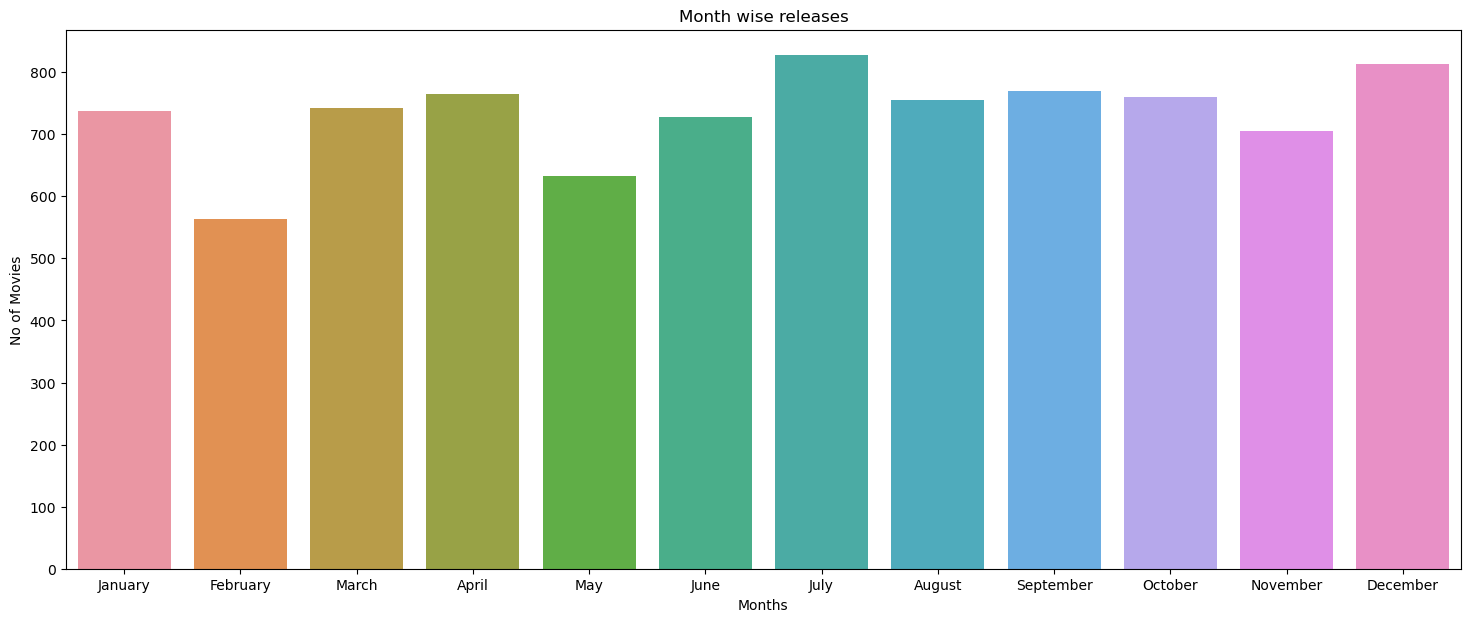

In [40]:
plt.figure(figsize=(18,7))

g = sns.countplot(x='month', data=netflix)
g.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'])
g.set_xlabel("Months")
g.set_ylabel("No of Movies")
g.set_title("Month wise releases")
#Showing content distribution based on rating